In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_train = pd.read_csv('reduced_training_data.csv')

In [3]:
df_train.head()

,user_id,date,id1,id2,id3
0,464300,1,4,34,714
1,354280,1,10,4,52
2,14946,1,4,49,279
3,14946,1,6,58,783
4,638732,1,6,3,613


## Favourites in a category
Have an analysis of what the most favourite categories are

In [10]:
ct1_distribution = df_train.groupby('id1')['user_id'].nunique()
ct2_distribution = df_train.groupby('id2')['user_id'].nunique()
ct3_distribution = df_train.groupby('id3')['user_id'].nunique()

<Container object of 920 artists>

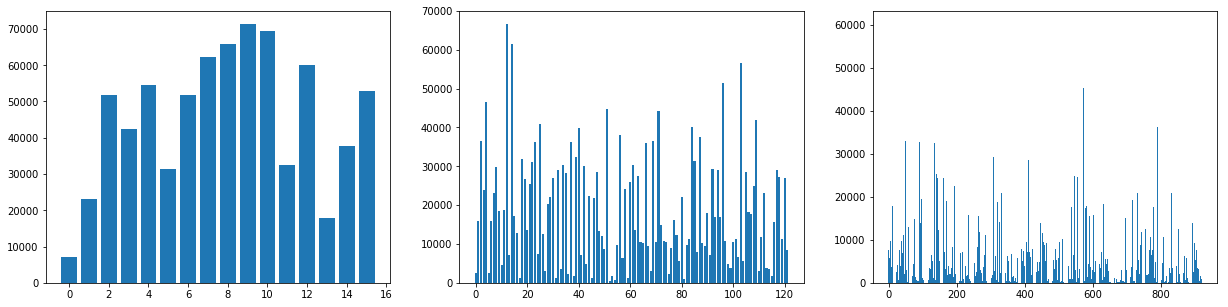

In [11]:
plt.figure(figsize=(21,5))
plt.subplot(1,3,1)
plt.bar(range(16), ct1_distribution)
plt.subplot(1, 3, 2)
plt.bar(range(ct2_distribution.shape[0]), ct2_distribution)
plt.subplot(1, 3, 3)
plt.bar(range(ct3_distribution.shape[0]), ct3_distribution)

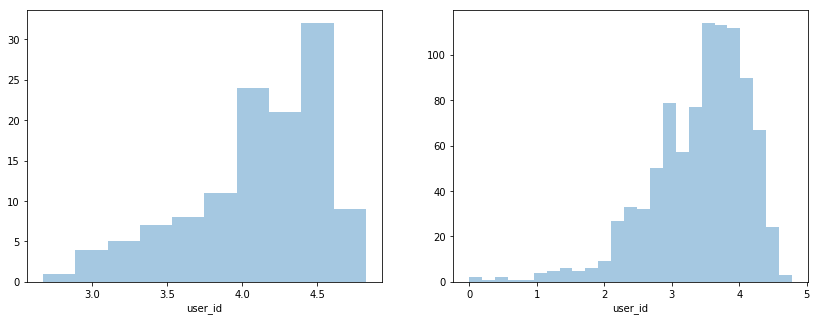

In [16]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
sns.distplot(np.log10(ct2_distribution), kde=False)
plt.subplot(1, 2, 2)
sns.distplot(np.log10(ct3_distribution), kde=False)

# What is the appropriate window for a feature vector?

We present the following flow to build a predictive model:
- 1) Create a 923 dimensional feature vector (#ids) for each user. Each entry counts the number of separate days on which the user clicked on the product id3.
- 2) For each id3, train a model (in our case, regression trees) to predict the number of times the user is going to click on the product in the next week.
- 3) For each user, select the 5 highest products that have not been used in the previous week. Rank users by the sum of their prediction values. 

Below, a method to create feature vectors.

In [ ]:
# Sample the users to make everything a bit faster
sampled_user = pd.Series(df_train['user_id'].unique()).sample(frac=0.01)
product_categories = df_train['id3'].unique()
user_indices = df_user_sampled['user_id'].unique()

In [352]:
user_ids = sorted(df_train['user_id'].unique())
product_categories = sorted(df_train['id3'].unique())

In [ ]:
%%time
X_train = create_feature_matrix(df_user_sampled, day_begin=27, day_end=47, indices = user_indices, columns=product_categories)
y_train = create_feature_matrix(df_user_sampled, day_begin=48, day_end=54, indices = user_indices, columns=product_categories)
X_predict = create_feature_matrix(df_user_sampled, day_begin=34, day_end=54, indices = user_indices, columns=product_categories)
y_predict = create_feature_matrix(df_user_sampled, day_begin=48, day_end=54, indices = user_, columns=product_categories)

In [363]:
df_train.head()

,user_id,date,id1,id2,id3
0,464300,1,4,34,714
1,354280,1,10,4,52
2,14946,1,4,49,279
3,14946,1,6,58,783
4,638732,1,6,3,613


In [383]:
print(previously_seen_items.shape)
print(X_test.shape)

(75101, 920)
(75101, 920)


In [405]:
%%time
day_split_test = 55
day_split_train = 48

# Sample the users to make everything a bit faster
sampled_user = pd.Series(df_train['user_id'].unique()).sample(frac=0.01)
df_user_sampled = df_train[df_train['user_id'].isin(sampled_user)]
product_categories = sorted(df_train['id3'].unique())
user_indices = sorted(df_user_sampled['user_id'].unique())
user_indices_all = sorted(df_train['user_id'].unique())


prediction_score = []
previously_seen_items = create_feature_matrix(df_train = df_train, 
                                              day_begin = day_split_test - 21, 
                                              day_end = day_split_test - 1,
                                              indices = user_indices_all, 
                                              columns = product_categories)

actual_result = df_user_sampled[df_user_sampled['date'] >= day_split_test]
prediction_period = 8
max_depth_regression_tree = 3

print("Now preparing the training")
X_train = create_feature_matrix(df_train = df_user_sampled, 
                                day_begin = day_split_train - prediction_period, 
                                day_end = day_split_train - 1,
                                indices = user_indices, 
                                columns = product_categories)
y_train = create_feature_matrix(df_train = df_user_sampled,
                                day_begin = day_split_train,
                                day_end = day_split_train + 6,
                                indices = user_indices, 
                                columns = product_categories)
X_test = create_feature_matrix(df_train = df_train, 
                               day_begin = day_split_test - prediction_period, 
                               day_end = day_split_test - 1,
                               indices = user_indices_all, 
                               columns = product_categories)
print("Now computing")
result = create_top_5_predictions(user_indices_all,
                                  product_categories,
                                  X_train,
                                  y_train,
                                  X_test,
                                  previously_seen_items,
                                  max_depth_regression_tree = max_depth_regression_tree,
                                  verbose = True)

print("Now printing")
to_submit = result.nlargest(n=53979, columns='score')
to_submit.to_csv('predictions/Prediction_AK_2.csv', 
                 columns=['user_id', 'id3_1', 'id3_2', 'id3_3', 'id3_4', 'id3_5'], 
                 index=False)

Now preparing the training
Now computing
Currently predicting: 0 
Currently predicting: 100 
Currently predicting: 200 
Currently predicting: 300 
Currently predicting: 400 
Currently predicting: 500 
Currently predicting: 600 
Currently predicting: 700 
Currently predicting: 800 
Currently predicting: 900 
Now printing
CPU times: user 8min 21s, sys: 6min 1s, total: 14min 22s
Wall time: 15min 1s


In [392]:
prediction_2 = pd.read_csv('predictions/Prediction_AK_2.csv')

In [393]:
prediction_2.head()

,user_id,id3_1,id3_2,id3_3,id3_4,id3_5
0,685959,741,390,13,610,725
1,301990,800,604,13,725,610
2,388552,730,10,725,13,610
3,638665,41,700,13,610,725
4,149939,800,215,13,725,610


Below some code to evaluate lookback time and depth of the regression tree

Currently working on: 1
45 of 225 correct
score 2000.0
Currently working on: 2
44 of 225 correct
score 1955.5555555555557
Currently working on: 3
42 of 225 correct
score 1866.6666666666667
Currently working on: 4
46 of 225 correct
score 2044.4444444444446
Currently working on: 5
40 of 225 correct
score 1777.7777777777778
Currently working on: 7
41 of 225 correct
score 1822.2222222222224
Currently working on: 10
37 of 225 correct
score 1644.4444444444446
Currently working on: 12
41 of 225 correct
score 1822.2222222222224
Currently working on: 15
40 of 225 correct
score 1777.7777777777778
Currently working on: 21
50 of 225 correct
score 2222.222222222222
CPU times: user 43.8 s, sys: 1.07 s, total: 44.8 s
Wall time: 46.2 s


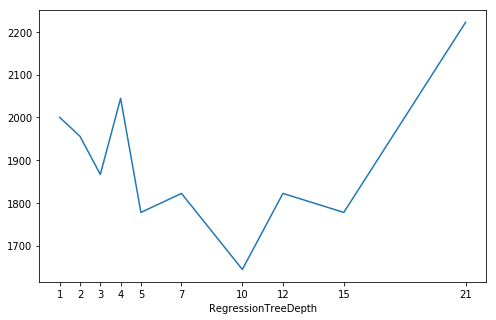

In [409]:
%%time
day_split_test = 48
day_split_train = 41

# Sample the users to make everything a bit faster
sampled_user = pd.Series(df_train['user_id'].unique()).sample(frac=0.003)
df_user_sampled = df_train[df_train['user_id'].isin(sampled_user)]
product_categories = sorted(df_train['id3'].unique())
user_indices = sorted(df_user_sampled['user_id'].unique())

prediction_score = []
previously_seen_items = create_feature_matrix(df_train = df_user_sampled, 
                                              day_begin = day_split_test - 21, 
                                              day_end = day_split_test - 1,
                                              indices = user_indices, 
                                              columns = product_categories)

actual_result = df_user_sampled[df_user_sampled['date'] >= day_split_test]
prediction_period = 7
regression_tree_depths = [1, 2, 3, 5, 7, 10, 12, 15, 20]
max_depth_regression_tree = 4
prediction_periods = [1, 2, 3, 4, 5, 7, 10, 12, 15, 21]

# for max_depth_regression_tree in regression_tree_depths:
for prediction_period in prediction_periods:
    print("Currently working on: %d" % prediction_period)
    X_train = create_feature_matrix(df_train = df_user_sampled, 
                                    day_begin = day_split_train - prediction_period, 
                                    day_end = day_split_train - 1,
                                    indices = user_indices, 
                                    columns = product_categories)
    y_train = create_feature_matrix(df_train = df_user_sampled,
                                    day_begin = day_split_train,
                                    day_end = day_split_train + 6,
                                    indices = user_indices, 
                                    columns = product_categories)
    X_test = create_feature_matrix(df_train = df_user_sampled, 
                                   day_begin = day_split_test - prediction_period, 
                                   day_end = day_split_test - 1,
                                   indices = user_indices, 
                                   columns = product_categories)
    result = create_top_5_predictions(user_indices,
                                      product_categories,
                                      X_train,
                                      y_train,
                                      X_test,
                                      previously_seen_items,
                                      max_depth_regression_tree)
    prediction_score.append(scoreResult(result, actual_result, verbose=True))
    
plt.figure(figsize=(8, 5))
plt.plot(prediction_periods, prediction_score)
plt.xlabel('RegressionTreeDepth')
plt.xticks(prediction_periods)
plt.savefig('Figures/DependenceRegressionDepth.jpg')

In [396]:
%%time
def create_top_5_predictions(user_indices, 
                             product_categories, 
                             X_train, 
                             y_train, 
                             X_test, 
                             previously_seen_items,
                             max_depth_regression_tree = 1,
                             verbose = False
                            ):
    """Automatically determine the predictions for the predictions
    
    Keyword arguments:
    user_ids -- A list of unique integers to guarantee consistency between different
    product_categories -- A list of the id3s for which predictions should be made
    X_train -- Feature vector, contains for each user_id in user_ids a vector of length len(product_categories)
    y_train -- Feature vector, needs to have the same dimensions as X_train
    X_test -- Feature vector, needs to have the same number of columns as X_train
    previously_seen_items -- Same shape as X_train, lists all entries that have been seen in the three weeks before the 
    prediction was made
    """
    prediction_frame = pd.DataFrame(index = user_indices, 
                                    columns = product_categories, 
                                    data = np.zeros((len(user_indices), len(product_categories))))

    for id_to_predict in product_categories:
        if verbose and id_to_predict % 100 == 0:
            print("Currently predicting: %d " % id_to_predict)

        ### If you want to build a different predictor, change this here
        ### Maybe build a decision tree classifier
        reg = DecisionTreeRegressor(max_depth = max_depth_regression_tree)
        reg.fit(X_train, y_train[id_to_predict])
        prediction_frame[id_to_predict] = reg.predict(X_test)

    # Find all the values that are eligible
    # Fast way to compute which values can be used
    unseen_items = np.ones(X_test.shape) - (previously_seen_items.values > 0)*1
    valid_prediction = pd.DataFrame(data = np.multiply(unseen_items, prediction_frame.values),
                                    index = user_indices, 
                                    columns = product_categories)
    
    @np.vectorize
    def index_to_id3(x):
        return product_categories[x]

    # Compute the top 5 predictions
    top_5_categories = np.argpartition(valid_prediction.values, -5)[:, -5:]
    score = np.array([valid_prediction.values[i, top_5_categories[i,:]] for i in range(valid_prediction.shape[0])]).sum(axis=1)
    ### SUPERIMPOTANT: Need to convert array indices of products into product categories!!!
    result = pd.concat([pd.DataFrame(data = top_5_categories).apply(index_to_id3), pd.DataFrame(data = score)], axis=1)
    result.index = valid_prediction.index
    result.reset_index(inplace=True)
    result.columns = ['user_id', 'id3_1', 'id3_2', 'id3_3', 'id3_4', 'id3_5', 'score']
    
    return result

CPU times: user 10 µs, sys: 1e+03 ns, total: 11 µs
Wall time: 15 µs


In [359]:
def create_feature_matrix(df_train, day_begin, day_end, indices=None, columns=None):
    """
    This method creates a feature matrix with user ids as rows and product_ids as columns
    Each entry counts the number of different days the user (row index) as looked at id3 (column index)
    This method can be used to create training data. As some user_ids or id3 may not be present in different
    timeframes, indices or columns can be given in order to achieve consistency
    """
    
    df_selected_entries = df_train[ (df_train['date'] >= day_begin)
                                  & (df_train['date'] <= day_end)]
    feature_matrix = pd.pivot_table(df_selected_entries, values='date',
                                    columns='id3', index='user_id',
                                    aggfunc = pd.Series.nunique)
    # We may need to add some additional indices if some users are not present during the time period
    if not indices is None:
        set_difference_indices = np.setdiff1d(indices, feature_matrix.index)
        if len(set_difference_indices) > 0:
            feature_matrix = pd.concat([feature_matrix, pd.DataFrame(index = set_difference_indices,
                                                                    columns = feature_matrix.columns)])

    # We may need to add some additional columns if some products are not present during the time period
    if not columns is None:
        set_difference_columns = np.setdiff1d(columns, feature_matrix.columns)
        if len(set_difference_columns) > 0:
            feature_matrix = pd.concat([feature_matrix, pd.DataFrame(index = feature_matrix.index,
                                                                     columns = set_difference_columns)],
                                       axis=1)
    
    feature_matrix.fillna(0, inplace=True)
    # Sort the index
    feature_matrix.sort_index(axis = 0, inplace=True)
    # Sort the columns
    feature_matrix.sort_index(axis = 1, inplace=True)
       
    return feature_matrix

In [17]:
df_train.shape

(14573050, 5)

In [19]:
df_user = df_train[df_train['user_id'] == 638732]

In [42]:
%%time
features_user = pd.pivot_table(df_train, values='date', columns='id3', index='user_id', aggfunc=pd.Series.nunique)

CPU times: user 5min 20s, sys: 5.16 s, total: 5min 25s
Wall time: 5min 32s


In [313]:
sampled_user = pd.Series(df_train['user_id'].unique()).sample(frac=1)

In [314]:
sampled_user.shape

(75101,)

In [315]:
df_user_sampled = df_train[df_train['user_id'].isin(sampled_user)]

In [290]:
predict_sampled_user.shape

(751, 658)

In [79]:
# This method creates a feature matrix with user ids as rows and product_ids as columns
# Each entry counts the number of different days the user (row index) as looked at id3 (column index)
# This method can be used to create training data. As some user_ids or id3 may not be present in different
# timeframes, indices or columns can be given in order to achieve consistency
def create_feature_matrix(df_train, day_begin, day_end, indices=None, columns=None):
    df_selected_entries = df_train[ (df_train['date'] >= day_begin)
                                  & (df_train['date'] <= day_end)]
    feature_matrix = pd.pivot_table(df_selected_entries, values='date',
                                    columns='id3', index='user_id',
                                    aggfunc = pd.Series.nunique)
    # We may need to add some additional indices if some users are not present during the time period
    if not indices is None:
        set_difference_indices = np.setdiff1d(indices, feature_matrix.index)
        if len(set_difference_indices) > 0:
            feature_matrix = pd.concat([feature_matrix, pd.DataFrame(index = set_difference_indices,
                                                                    columns = feature_matrix.columns)])

    # We may need to add some additional columns if some products are not present during the time period
    if not columns is None:
        set_difference_columns = np.setdiff1d(columns, feature_matrix.columns)
        if len(set_difference_columns) > 0:
            feature_matrix = pd.concat([feature_matrix, pd.DataFrame(index = feature_matrix.index,
                                                                     columns = set_difference_columns)],
                                       axis=1)
    
    feature_matrix.fillna(0, inplace=True)
    # Sort the index
    feature_matrix.sort_index(axis = 0, inplace=True)
    # Sort the columns
    feature_matrix.sort_index(axis = 1, inplace=True)
       
    return feature_matrix

In [83]:
df_train.head()

,user_id,date,id1,id2,id3
0,464300,1,4,34,714
1,354280,1,10,4,52
2,14946,1,4,49,279
3,14946,1,6,58,783
4,638732,1,6,3,613


In [291]:
%%time
user_ids = df_train['user_id'].unique()
product_categories = df_train['id3'].unique()
fm = create_feature_matrix(df_user_sampled, day_begin=10, day_end=40, indices=user_ids, columns=product_categories)


CPU times: user 28.4 s, sys: 1.48 s, total: 29.8 s
Wall time: 29.9 s


In [324]:
%%time
product_categories = df_train['id3'].unique()
user_indices = df_user_sampled['user_id'].unique()
X_train = create_feature_matrix(df_user_sampled, day_begin=27, day_end=47, indices = user_indices, columns=product_categories)
y_train = create_feature_matrix(df_user_sampled, day_begin=48, day_end=54, indices = user_indices, columns=product_categories)
X_predict = create_feature_matrix(df_user_sampled, day_begin=34, day_end=54, indices = user_indices, columns=product_categories)
# y_predict = create_feature_matrix(df_user_sampled, day_begin=48, day_end=54, indices = user_, columns=product_categories)

CPU times: user 5min 43s, sys: 9.92 s, total: 5min 53s
Wall time: 6min 4s


In [292]:
%%time
product_categories = df_train['id3'].unique()
user_indices = df_user_sampled['user_id'].unique()
X_train = create_feature_matrix(df_user_sampled, day_begin=10, day_end=30, indices = user_indices, columns=product_categories)
y_train = create_feature_matrix(df_user_sampled, day_begin=31, day_end=37, indices = user_indices, columns=product_categories)
X_predict = create_feature_matrix(df_user_sampled, day_begin=27, day_end=47, indices = user_indices, columns=product_categories)
y_predict = create_feature_matrix(df_user_sampled, day_begin=48, day_end=54, indices = user_, columns=product_categories)

CPU times: user 50.6 s, sys: 1.12 s, total: 51.8 s
Wall time: 55.7 s


In [325]:
%%time
user_ids = sorted(df_train['user_id'].unique())
product_categories = sorted(df_train['id3'].unique())
prediction_frame = pd.DataFrame(index = user_indices, 
                                columns = product_categories, 
                                data = np.zeros((len(user_indices), len(product_categories))))

for id_to_predict in product_categories:
    if id_to_predict % 100 == 0:
        print(id_to_predict)
        
    reg = DecisionTreeRegressor(max_depth=20)
    reg.fit(X_train, y_train[id_to_predict])
    prediction_frame[id_to_predict] = reg.predict(X_predict)

# Find all the values that are eligible
# Fast way to compute which values can be used
unseen_items = np.ones(X_predict.shape) - (X_predict.values > 0)*1
valid_prediction = pd.DataFrame(data = np.multiply(unseen_items, prediction_frame.values),
                                index = user_indices, 
                                columns = product_categories)

0
100
200
300
400
500
600
700
800
900
CPU times: user 1h 44min 48s, sys: 10min 39s, total: 1h 55min 28s
Wall time: 1h 56min 44s


In [327]:
valid_prediction.head()

,0,1,2,3,4,5,6,7,8,9,...,921,922,923,924,925,926,927,928,929,930
464300,0.004021,0.010871,0.0,0.000499,0.000062,0.000148,0.003779,0.000521,0.00007,0.000275,...,0.002942,0.000154,0.000514,0.000101,0.003801,0.003344,0.002027,0.000764,0.001347,0.000260
354280,0.009751,0.009427,0.0,0.003044,0.000560,0.000148,0.007649,0.000521,0.00007,0.001634,...,0.002942,0.000154,0.000514,0.000101,0.000000,0.008562,0.002027,0.000764,0.003540,0.001426
14946,0.004021,0.004426,0.0,0.000499,0.000062,0.000148,0.003779,0.000521,0.00007,0.000275,...,0.002942,0.000154,0.000514,0.000101,0.003801,0.003344,0.002027,0.000764,0.001347,0.000260
638732,0.004021,0.004426,0.0,0.003044,0.000062,0.000000,0.007649,0.000521,0.00007,0.000275,...,0.002942,0.000154,0.000514,0.000101,0.003801,0.003344,0.002027,0.000764,0.001347,0.000000
327337,0.004021,0.004426,0.0,0.000499,0.000062,0.000148,0.003779,0.000521,0.00007,0.000275,...,0.002942,0.000154,0.000514,0.000101,0.003801,0.003344,0.002027,0.000764,0.003540,0.000260


In [342]:
%%time
# Compute the top 5 predictions
top_5_categories = np.argpartition(valid_prediction.values, -5)[:, -5:]
score = np.array([valid_prediction.values[i, top_5_categories[i,:]] for i in range(valid_prediction.shape[0])]).sum(axis=1)
### SUPERIMPOTANT: Need to convert array indices of products into product categories!!!
result = pd.concat([pd.DataFrame(data = top_5_categories).apply(index_to_id3), pd.DataFrame(data = score)], axis=1)
result.index = valid_prediction.index
result.reset_index(inplace=True)
result.columns = ['user_id', 'id3_1', 'id3_2', 'id3_3', 'id3_4', 'id3_5', 'score']

CPU times: user 1.64 s, sys: 280 ms, total: 1.92 s
Wall time: 1.94 s


In [341]:
@np.vectorize
def index_to_id3(x):
    return product_categories[x]

In [343]:
to_submit = result.nlargest(n=53979, columns='score')

In [339]:
submitted = pd.read_csv('predictions/Prediction_AK_1.csv')

In [351]:
ors = pd.concat([pd.DataFrame(data = top_5_categories), pd.DataFrame(data = score)], axis=1)
ors.columns = ['id3_1', 'id3_2', 'id3_3', 'id3_4', 'id3_5', 'score']
ors.nlargest(n=10, columns='score')

,id3_1,id3_2,id3_3,id3_4,id3_5,score
12586,279,123,316,190,45,30.0
49147,444,229,269,193,190,30.0
73775,676,918,376,271,123,27.0
2361,918,125,679,604,77,20.0
5666,45,125,180,77,444,20.0
31100,696,326,272,228,750,20.0
36881,630,80,50,69,577,20.0
38990,898,393,151,183,374,20.0
42791,125,45,788,423,266,20.0
43723,695,267,135,245,796,20.0


In [340]:
submitted.head()

,user_id,id3_1,id3_2,id3_3,id3_4,id3_5
0,20874,281,124,318,192,46
1,244905,449,231,271,195,192
2,761517,685,929,379,273,124
3,871071,929,126,688,613,78
4,667082,46,126,182,78,449


In [346]:
to_submit.head(10000)

,user_id,id3_1,id3_2,id3_3,id3_4,id3_5,score
12586,20874,281,124,318,192,46,30.000000
49147,244905,449,231,271,195,192,30.000000
73775,761517,685,929,379,273,124,27.000000
2361,871071,929,126,688,613,78,20.000000
5666,667082,46,126,182,78,449,20.000000
31100,854741,705,328,274,230,760,20.000000
36881,785355,639,81,51,70,586,20.000000
38990,893596,909,397,152,185,377,20.000000
42791,50300,126,46,798,428,268,20.000000
43723,343982,704,269,136,247,806,20.000000


In [338]:
to_submit.to_csv('predictions/Prediction_AK_1.csv', 
                 columns=['user_id', 'id3_1', 'id3_2', 'id3_3', 'id3_4', 'id3_5'], 
                 index=False)

In [311]:
test = df_user_sampled[df_user_sampled['date'] >= 48]

In [312]:
%%time
scoreResult(result, test, verbose=True)

2707 of 7510 correct
score 3604.527296937417


3604.5272969374168

In [275]:
def scoreResult(pred, test, verbose=False):
    """
    Compute the score of a prediction as done in the leaderbord.
    
    Give your predictions and the test set as pandas data frames as specified in the problem statement. Returns the score of the predictions without making further sanity checks. `verbose` can be set to true to print more output.
    """
    score = 0
    for i, row in pred.iterrows():
        hit = False
        for id3 in [row["id3_{}".format(i)] for i in range(1, 6)]:
            if ((test["user_id"] == row["user_id"]) & (test["id3"] == id3)).any():
                hit = True
        if hit:
            score += 1
    if verbose: print("{} of {} correct".format(score, pred["user_id"].count()))
    score = (score / pred["user_id"].count()) * 10000
    if verbose: print("score {}".format(score))
    return score

In [253]:
np.array([valid_prediction.values[i, top_5_categories[i,:]] for i in range(valid_prediction.shape[0])]).sum(axis=1).shape

(751,)

920

In [198]:
valid_prediction.iloc[0,:].max()

0.092071611253196933

In [210]:
array_indices = np.argpartition(valid_prediction.values, -5)[:, -5:].max()

In [202]:
valid_prediction.values[0,:].max()

0.092071611253196933

In [207]:
valid_prediction.values[1, 372]

3.0

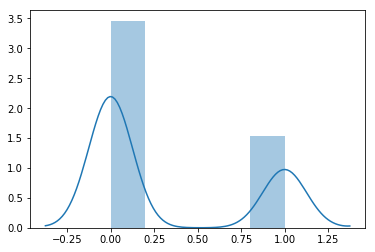

In [128]:
sns.distplot(prediction_success > 0, norm_hist=True)

In [149]:
a = np.random.rand(10,10)
b = np.zeros((10, 10))
np.fill_diagonal(b, val=1)
# print(np.array(a))
np.multiply(a, b)

array([[ 0.53432397,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.53569351,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.67811417,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.99428792,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.23125582,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.42628647,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.52689104,  0.        

In [158]:
a = np.ones((10, 10))
a

array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]])

In [177]:
# Fast way to compute which values can be used
a = np.ones(X_predict.shape)
b = a - (X_predict.values > 0)*1

0.0

In [173]:
#     y42_pred = pd.DataFrame(reg.predict(X_predict), index=X_predict.index)
#     y42_pred['pred'] = y_predict[id_to_predict]
#     y42_pred.columns = ['pred', 'actual']
#     # Fraction of 'correct' answers
#     if y42_pred[y42_pred['actual'] >= 1].shape[0] > 0:
#         prediction_success[ct] = y42_pred[(y42_pred['actual'] >= 1) 
#                                         & (y42_pred['pred'] >= 0.5)].shape[0] # / y42_pred[y42_pred['actual'] >= 1].shape[0]
        
#     ct += 1

1

In [91]:
X_train.shape

(729, 920)

In [92]:
y_train.shape

(749, 920)

ValueError: Number of labels=749 does not match number of samples=729

In [61]:
%%time
features_sampled_user = pd.pivot_table(df_user_sampled_train, values='date', columns='id3', index='user_id', aggfunc=pd.Series.nunique)
features_sampled_user.fillna(0, inplace=True)
predict_sampled_user = pd.pivot_table(df_user_sampled_predict, values='date', columns='id3', index='user_id', aggfunc=pd.Series.nunique)
predict_sampled_user.fillna(0, inplace=True)

CPU times: user 1.89 s, sys: 18.7 ms, total: 1.91 s
Wall time: 1.92 s


In [59]:
from sklearn.tree import DecisionTreeRegressor

In [76]:
pd.DataFrame(index=features_sampled_user.index, columns=features_sampled_user.columns)

id3,0,1,3,4,5,6,7,8,9,10,...,921,922,923,924,925,926,927,928,929,930
user_id,,,,,,,,,,,,,,,,,,,,,
736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2914,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6523,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11632,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
reg_id42 = DecisionTreeRegressor(max_depth=5)
reg_id42.fit(features_sampled_user, predict_sampled_user[42])

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

In [3]:
%%time
future_date_jaccard_metric = np.zeros((54, 54))
for d1 in range(1, 54):
    s1 = df_train[df_train['date'] == d1]['user_id'].nunique()
    for d2 in range(d1, 55):
        s2 = df_train[df_train['date'] == d2]['user_id'].nunique()
        
        s_cb = df_train[(df_train['date'] == d1) 
                      & (df_train['date'] == d2)]['user_id'].nunique()
        
        future_date_jaccard_metric[d1-1, d2-1] = s_cb / (s1 + s2 - s_cb)

KeyboardInterrupt: 

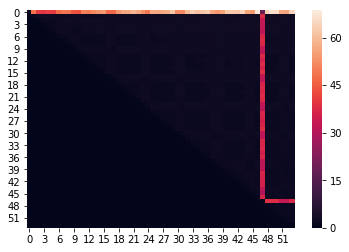

In [21]:
sns.heatmap(future_date_jaccard_metric)

In [16]:
future_date_jaccard_metric

array([[  1.        ,  48.07142857,  40.27297297, ...,  56.60248447,
         56.17939394,  64.7482679 ],
       [  0.        ,   1.        ,   2.1685542 , ...,   2.73627751,
          2.73386022,   2.33254009],
       [  0.        ,   0.        ,   1.        , ...,   2.54910544,
          2.56458629,   2.84503544],
       ..., 
       [  0.        ,   0.        ,   0.        , ...,   1.        ,
          1.80440865,   2.087818  ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          1.        ,   1.97561903],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [20]:
df_train[(df_train['date'] == d1) | (df_train['date'] == d2)].groupby('user_id').count()

,date,id1,id2,id3
user_id,,,,
9,3,3,3,3
27,9,9,9,9
29,1,1,1,1
30,54,54,54,54
43,2,2,2,2
51,4,4,4,4
116,4,4,4,4
134,2,2,2,2
137,2,2,2,2


In [18]:
df_train.head()

,user_id,date,id1,id2,id3
0,464300,1,4,34,714
1,354280,1,10,4,52
2,14946,1,4,49,279
3,14946,1,6,58,783
4,638732,1,6,3,613


In [ ]:
%%time

one_day_transfer_matrix = np.zeros((16, 16))
d1 = 2
d2 = 3
for pn1 in range(16):
    u1 = frequent_users[(frequent_users['id1'] == pn1) & (frequent_users['date'] == d1)]['user_id'].unique()
    s1 = u1.shape[0]
    for pn2 in range(16):
        u2 = frequent_users[(frequent_users['id1'] == pn2) & (frequent_users['date'] == d2)]['user_id'].unique()
        
        s2 = u2.shape[0]
        us = np.intersect1d(u1, u2, assume_unique=True).shape[0]
        
        if s1 + s2 == 0:
            one_day_transfer_matrix[pn1, pn2] = 0.0
        else:
            one_day_transfer_matrix[pn1, pn2] = us / (s1 + s2 - us)